## Final Project Submission

Please fill out: 
* Student name: Margaret Mitey
* Student pace: Full time
* Scheduled project review date/time: 9/7/2023
* Instructor name: Veronica Isiaho
* Blog post URL:


BUSINESS UNDERSTANDING

INTRODUCTION

The real estate market is a critical driver of economic growth in many countries globally. It is a dynamic and ever-changing industry where key stakeholders (buyers and sellers) have to make accurate prediction of home prices in order to make informed decisions through use of reliable and comprehensive data.

Real estate is dramatically affected by its location and factors such as employment rates, economy, crime rates, transport facilities and land rates.

The King County House Sale dataset is a valuable source of information for analysing house sales in the Northwestern county. The dataset has several variables that can act as key indicators in price of houses in this area such as Zip code, number of bedrooms, number of bath rooms, square feet, numeric grade and the year the house was built.
The dataset will be used for analysis and modelling to better understand the factor that affects house pricing.

BUSINESS PROBLEM
A real estate agency that helps homeowners buy and/ or sell homes is looking into how certain features could affect the pricing of houses in King County and by what amount so as to make appropriate recommendations/ predictions to their clients. 

SPECIFIC OBJECTIVES
For the real estate agency to make the appropriate recommendations. The following objectives need to be answered:
1. Determine key factors that impact housing prices in King County.
2. How number of bedrooms, bathrooms, grade, square footage, year built and the zipcode of the house correlate with its sale price.
3. Predict house sale price given certain house specification.

DATA UNDERSTANDING
The project will use the King County House Sales dataset


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import statsmodels.api as sm
import numpy as np
import scipy.stats as stats

In [30]:
data= pd.read_csv("data\kc_house_data.csv")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [31]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

DATA PREPARATION

This is to select the data that will be used, make necessary convertions from categorical to numerical and perform data cleaning

In [33]:
# Display the first few rows of the dataset
pd.DataFrame(data.head())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [34]:
# Chec for the data type of each column in the dataframe
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [35]:
# Check for miising values
data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [36]:
# Drop columns with missing values
print(data.dropna(axis=1, inplace=True))

None


In [37]:
# Check for duplicates in the row
print(data.duplicated().sum())

0


In [38]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


In [39]:
# Splitting the grade cell into numerical and descpriptive
# Define a function to extract the numeric grade from the grade column
def extract_numeric_grade(s):
    numeric_str = ''
    for char in s:
        if char.isdigit():
            numeric_str += char
    return int(numeric_str)

# Define a function to extract the grade description from the grade column
def extract_grade_desc(s):
    grade_desc = ''
    for char in s:
        if not char.isdigit() and char != ' ':
            grade_desc += char
    return grade_desc.strip()

# Extract the numeric grade and grade description using the custom functions
data['numeric_grade'] = data['grade'].apply(lambda x: extract_numeric_grade(x))
data['grade_desc'] = data['grade'].apply(lambda x: extract_grade_desc(x))

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,numeric_grade,grade_desc
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,7,Average
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,7,Average
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062,6,LowAverage
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,7,Average
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,8,Good


In [40]:
# Dropping id, date, condition and grade
data.drop(columns=['condition', 'grade', 'id', 'date'], inplace=True)

data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,numeric_grade,grade_desc
0,221900.0,3,1.00,1180,5650,1.0,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,7,Average
1,538000.0,3,2.25,2570,7242,2.0,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,7,Average
2,180000.0,2,1.00,770,10000,1.0,770,0.0,1933,98028,47.7379,-122.233,2720,8062,6,LowAverage
3,604000.0,4,3.00,1960,5000,1.0,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,7,Average
4,510000.0,3,2.00,1680,8080,1.0,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,8,Good


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   sqft_above     21597 non-null  int64  
 7   sqft_basement  21597 non-null  object 
 8   yr_built       21597 non-null  int64  
 9   zipcode        21597 non-null  int64  
 10  lat            21597 non-null  float64
 11  long           21597 non-null  float64
 12  sqft_living15  21597 non-null  int64  
 13  sqft_lot15     21597 non-null  int64  
 14  numeric_grade  21597 non-null  int64  
 15  grade_desc     21597 non-null  object 
dtypes: float64(5), int64(9), object(2)
memory usage: 2.6+ MB


In [42]:
# Creating correlation of the columns
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,numeric_grade
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,-0.053402,0.306692,0.022036,0.585241,0.082845,0.667951
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.356563
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,-0.204786,0.024280,0.224903,0.569884,0.088303,0.665838
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,-0.199802,0.052155,0.241214,0.756402,0.184342,0.762779
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.114731
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.458794
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,-0.261570,-0.001199,0.344842,0.731767,0.195077,0.756073
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.347210,-0.148370,0.409993,0.326377,0.070777,0.447865
zipcode,-0.053402,-0.154092,-0.204786,-0.199802,-0.129586,-0.059541,-0.261570,-0.347210,1.000000,0.266742,-0.564259,-0.279299,-0.147294,-0.185771
lat,0.306692,-0.009951,0.024280,0.052155,-0.085514,0.049239,-0.001199,-0.148370,0.266742,1.000000,-0.135371,0.048679,-0.086139,0.113575


In [43]:
# Correlation of columns with price
pd.DataFrame(data.corr()['price']).sort_values(by='price',ascending=False)

,price
price,1.000000
sqft_living,0.701917
numeric_grade,0.667951
sqft_above,0.605368
sqft_living15,0.585241
bathrooms,0.525906
bedrooms,0.308787
lat,0.306692
floors,0.256804
sqft_lot,0.089876


In [44]:
# Selecting relevant columns to use
relevant_columns=['price', 'sqft_living','numeric_grade','bathrooms', 'bedrooms', 'yr_built', 'zipcode']
data=data[relevant_columns]
data

,price,sqft_living,numeric_grade,bathrooms,bedrooms,yr_built,zipcode
0,221900.0,1180,7,1.00,3,1955,98178
1,538000.0,2570,7,2.25,3,1951,98125
2,180000.0,770,6,1.00,2,1933,98028
3,604000.0,1960,7,3.00,4,1965,98136
4,510000.0,1680,8,2.00,3,1987,98074
...,...,...,...,...,...,...,...
21592,360000.0,1530,8,2.50,3,2009,98103
21593,400000.0,2310,8,2.50,4,2014,98146
21594,402101.0,1020,7,0.75,2,2009,98144
21595,400000.0,1600,8,2.50,3,2004,98027


In [45]:
# Statistical Description
data.describe()

,price,sqft_living,numeric_grade,bathrooms,bedrooms,yr_built,zipcode
count,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,2080.321850,7.657915,2.115826,3.373200,1970.999676,98077.951845
std,3.673681e+05,918.106125,1.173200,0.768984,0.926299,29.375234,53.513072
min,7.800000e+04,370.000000,3.000000,0.500000,1.000000,1900.000000,98001.000000
25%,3.220000e+05,1430.000000,7.000000,1.750000,3.000000,1951.000000,98033.000000
50%,4.500000e+05,1910.000000,7.000000,2.250000,3.000000,1975.000000,98065.000000
75%,6.450000e+05,2550.000000,8.000000,2.500000,4.000000,1997.000000,98118.000000
max,7.700000e+06,13540.000000,13.000000,8.000000,33.000000,2015.000000,98199.000000


In [46]:
# Remove outliers
#function to remove outliers
def remove_outliers(data, cols):
    for col in cols:
        z = np.abs(stats.zscore(data[col]))
        threshold = 3
        data = data[z < threshold]
    return data
cols_to_remove_outliers = ['sqft_living','bathrooms','bedrooms','numeric_grade','price', 'zipcode']
data = remove_outliers(data , cols_to_remove_outliers)
data

,price,sqft_living,numeric_grade,bathrooms,bedrooms,yr_built,zipcode
0,221900.0,1180,7,1.00,3,1955,98178
1,538000.0,2570,7,2.25,3,1951,98125
2,180000.0,770,6,1.00,2,1933,98028
3,604000.0,1960,7,3.00,4,1965,98136
4,510000.0,1680,8,2.00,3,1987,98074
...,...,...,...,...,...,...,...
21592,360000.0,1530,8,2.50,3,2009,98103
21593,400000.0,2310,8,2.50,4,2014,98146
21594,402101.0,1020,7,0.75,2,2009,98144
21595,400000.0,1600,8,2.50,3,2004,98027


In [47]:
data.describe()

,price,sqft_living,numeric_grade,bathrooms,bedrooms,yr_built,zipcode
count,2.049700e+04,20497.000000,20497.000000,20497.000000,20497.000000,20497.000000,20497.000000
mean,4.855605e+05,1971.886325,7.532371,2.046934,3.322047,1970.575401,98078.831488
std,2.250129e+05,752.789256,1.003282,0.690846,0.855173,29.262158,53.492476
min,7.800000e+04,370.000000,5.000000,0.500000,1.000000,1900.000000,98001.000000
25%,3.150000e+05,1400.000000,7.000000,1.500000,3.000000,1951.000000,98033.000000
50%,4.399500e+05,1860.000000,7.000000,2.000000,3.000000,1974.000000,98070.000000
75%,6.075000e+05,2440.000000,8.000000,2.500000,4.000000,1996.000000,98118.000000
max,1.350000e+06,4800.000000,10.000000,4.250000,6.000000,2015.000000,98199.000000


From the data description we can see that:
1. The average price of houses in King County is $4,855,605 and the most expensive is $13,500,000.
2. The average size of houses is 1971 square feet and the biggest size is 4800 square feet.
3. The average number of bedrooms is 3 and the most number of bedrooms is 6.
4. The average number of bathrooms is 2 and the most number of bathrooms in a house is 4.

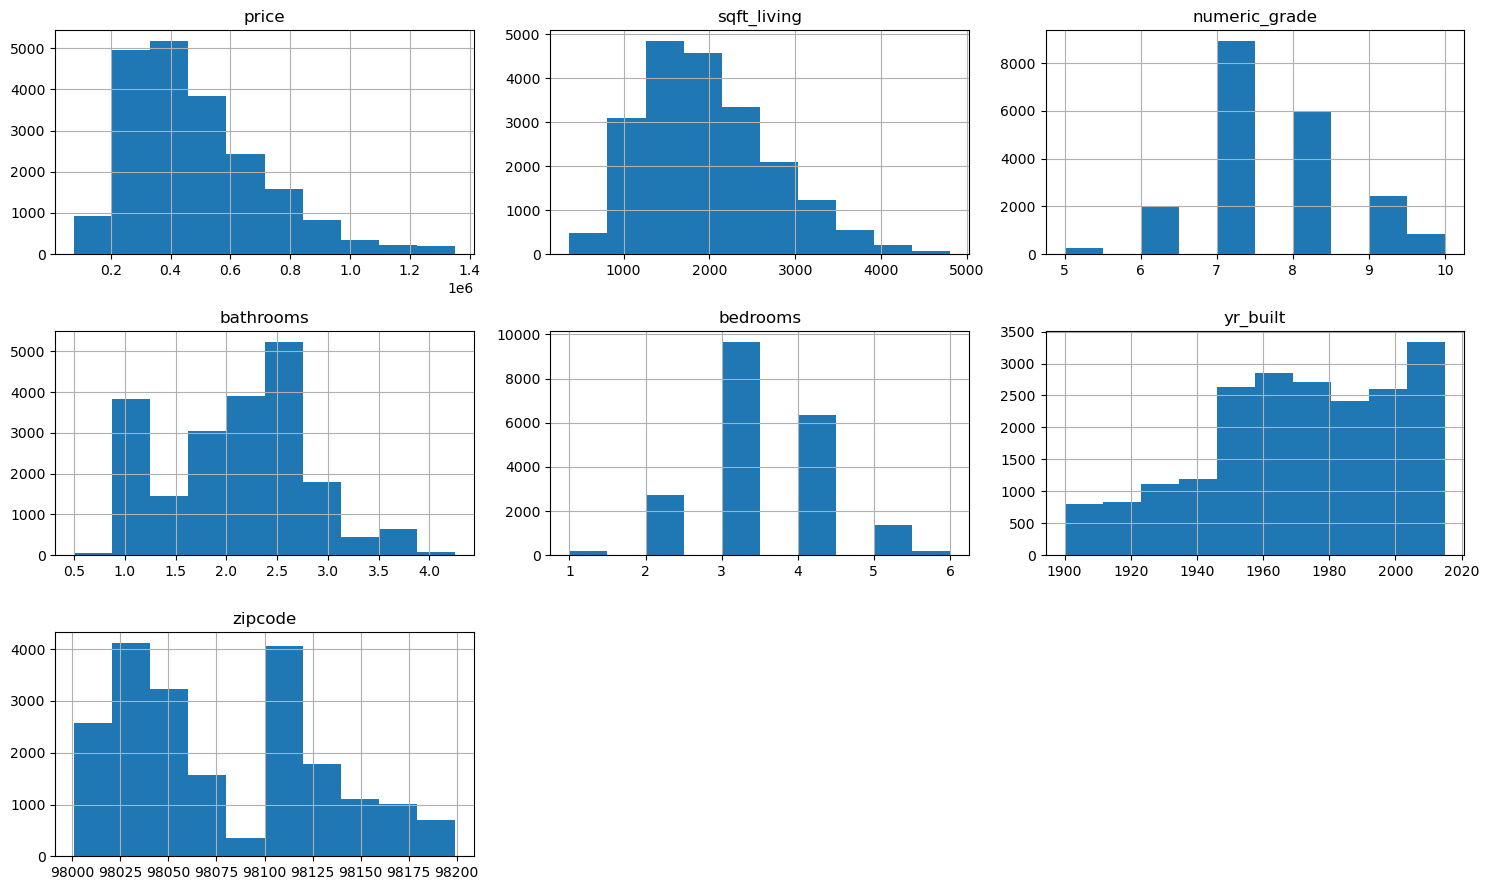

In [48]:
#Visualization of the relevant columns
data.hist(figsize=(15, 9))
plt.tight_layout()
plt.show()

The graphs above give visual description of the statistical analysis.

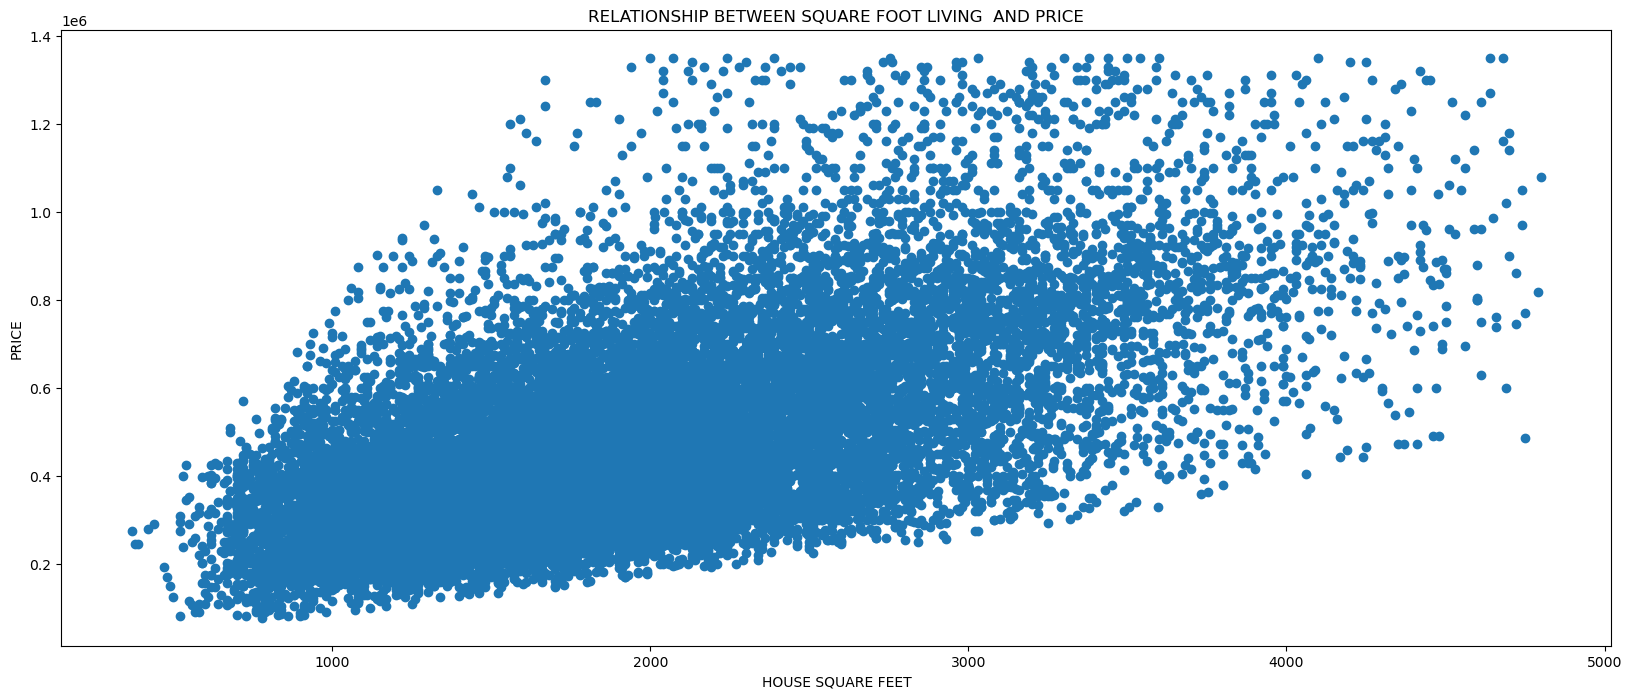

In [49]:
fig,ax=plt.subplots(figsize=(20,8))
ax.scatter(data['sqft_living'], data['price'])
ax.set_xlabel('HOUSE SQUARE FEET')
ax.set_ylabel('PRICE')
ax.set_title('RELATIONSHIP BETWEEN SQUARE FOOT LIVING  AND PRICE');

There is a positive linear relationship between price and house square feet

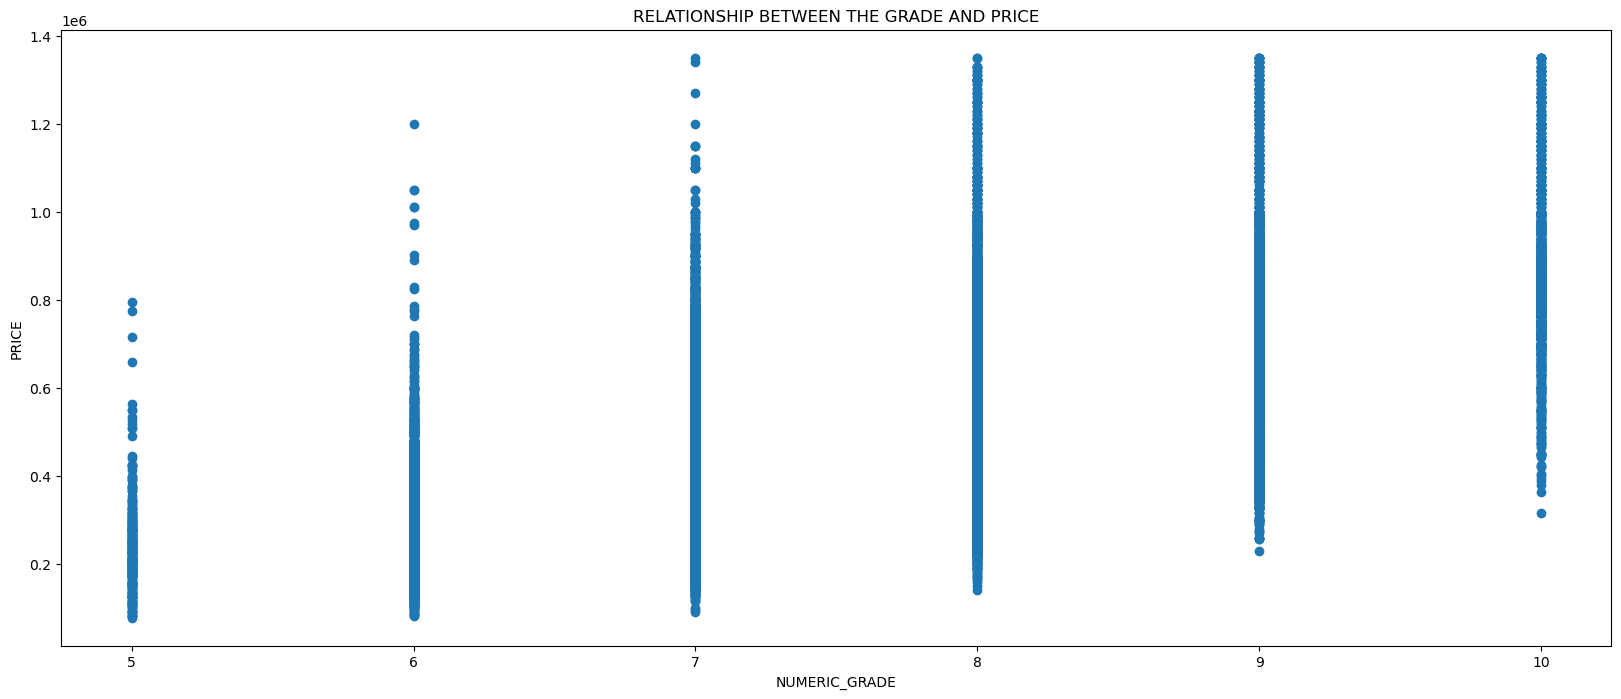

In [50]:
fig,ax=plt.subplots(figsize=(20,8))
ax.scatter(data['numeric_grade'], data['price'])
ax.set_xlabel('NUMERIC_GRADE')
ax.set_ylabel('PRICE')
ax.set_title('RELATIONSHIP BETWEEN THE GRADE AND PRICE');

<AxesSubplot:>

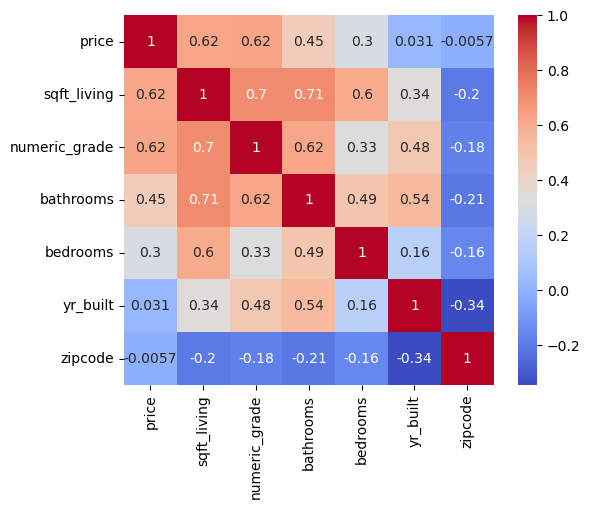

In [51]:
# Checking for Multicollinearity
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', square=True)


MODELING

In [52]:
# Modeling with one predictor to be the baseline model
x = data["sqft_living"]
y = data["price"]

x = sm.add_constant(x)

model = sm.OLS(y, sm.add_constant(x))
result = model.fit(method='pinv')
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                 1.270e+04
Date:                Fri, 07 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:18:12   Log-Likelihood:            -2.7675e+05
No. Observations:               20497   AIC:                         5.535e+05
Df Residuals:                   20495   BIC:                         5.535e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         1.21e+05   3462.996     34.950      0.000    1.14e+05    1.28e+05
sqft_living   184.8631      1.641    112.674      0.000     181.647     188.079
==============================================================================
Omnibus:                     2335.936   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3666.741
Skew:                           0.823   Prob(JB):                         0.00
Kurtosis:                       4.258   Cond. No.                     5.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interpretation of the model

1. The model is statistically significant overall, with an F-statistic p-value well below 0.05

2. The model explains about 38% of the variance in price

3. The model coefficients (const and sqft_living) are both statistically significant, with t-statistic p-values of 0.000 which is well below 0.05

4. for 0 sqft_living, the estimated price is estimated to be $121000.

5. For 1 unit increase in sqft_living, there is an associated increase in price of about $184

Adding more independent variables

In [53]:
x = data[["sqft_living", "numeric_grade", "bathrooms", "bedrooms", "yr_built", "zipcode"]]
y = data["price"]

x = sm.add_constant(x)

model = sm.OLS(y,x)

result = model.fit(method='pinv')

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     4344.
Date:                Fri, 07 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:18:12   Log-Likelihood:            -2.7328e+05
No. Observations:               20497   AIC:                         5.466e+05
Df Residuals:                   20490   BIC:                         5.466e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.126e+07   2.08e+06     -5.403      0.000   -1.53e+07   -7.18e+06
sqft_living     103.3683      2.529     40.873      0.000      98.411     108.325
numeric_grade  1.144e+05   1589.759     71.987      0.000    1.11e+05    1.18e+05
bathrooms      4.573e+04   2455.366     18.626      0.000    4.09e+04    5.05e+04
bedrooms      -2.058e+04   1571.866    -13.092      0.000   -2.37e+04   -1.75e+04
yr_built      -2926.3181     46.603    -62.792      0.000   -3017.664   -2834.972
zipcode         167.4499     20.957      7.990      0.000     126.373     208.526
==============================================================================
Omnibus:                     2084.988   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4050.409
Skew:                           0.674   Prob(JB):                         0.00
Kurtosis:                       4.710   Cond. No.                     1.96e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interpretation of model with 6 predictors

1. The model explains a 56% of the variance in price which shows an increase compared to the first model which had a variance of 38% with only one predictor (sqft_living).

2. The model is statistically significant overally, with an F-statistic p-value below 0.05.

3. The model coefficients (const, sqft_living, numeric_grade, bathrooms, bedrooms, yr_built and zipcode) are all statistically significant, with t-statistic p-values of 0.000 which is below 0.05

4. For each increase of 1 sqft in sqft_living, there is an increase in price of about $103

5. For each increase in numeric grade, there is an increase in price of about $114400

5. For each increase of 1 bathroom, we see an associated increase in price of about $45730

6. For each increase of 1 bedroom , we see an associated decrease in price of about $20580

7. For a change in location zipcode, there is an increase in price by $167

RECOMMENDATIONS

1. The real estate agency should advice their clients that the pricing of houses increases with each sqft increase of the house and they should showcase this.
2. Houses with higher numerical grade fall in high price category. Home owners should be advised to improve the grade of their houses so at to increase their value.
3. There are certain zipcodes that are more expensive than others as the price of houses increases by $167. The real estate agency should highlight this areas to home buyers and sellers.
4. Buyers who are looking for high-end properties may not necessarily prioritize the number of bedrooms. Therefore, sellers should be aware that adding additional bedrooms may not necessarily increase the value of the property as houses with more bedrooms have low prices.
5. The more the bathrooms a house has, the price increases by $45730. The real estate agents should showcase that bathrooms are a great addition to the house as it increases its price.

CONCLUSION

This project is aimed to develop a model to predict housing prices in King County based on various features such as square footage, number of bedrooms and bathrooms, grading and zipcode.

Firstly, we performed exploratory data analysis (EDA) and found that the price of houses was positively correlated with the square footage and the grade of the house. We also discovered that the location of the house had a significant impact on the price.

Secondly, multiple linear regression models was used to predict the price of the house. The model included square footage, grade, bedrooms, bathrooms and zipcode as the predictors performed reasonably well, explaining about 56% of the variance in price.

Based on the results, we can conclude that square footage, the numeric grade and zipcode of the house are significant predictors of housing prices in King County. 

Next Step

Further research and an indepth analysis should be done to improve the accuracy of the models and to gain a better understanding of the factors that influence housing prices in King County.